# Imperial PIN 
## September Meetup

## Gasoline Demand Forecasting

# Gasoline Demand Forecasting Task

The purpose of this month's meeting is introduce a mini-competition to forecast weekly US gasoline demand. We will be using real volume data from the [EIA Website](https://www.eia.gov/opendata/qb.php?category=714803)

# Background

The US Energy Information Agency publishes refined product production, import, export and inventory data every Wednesday for the week prior (Friday to Thursday). This is then used to calculate the implied demand ($D = P+I-E-\Delta I$) which is a major driver of gasoline prices across North America.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import narwhal as nw
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 7)
plt.style.use('ggplot')

# import matplotlib as mpl
# sorted(mpl.style.available)

from narwhal.get_data import hana_utils as hu 

up = nw.set_options(pass_file='../../user.json')
nw.set_proxy("iboss")

pd.set_option('display.float_format', lambda x: '%.5f' % x) # pandas
np.set_printoptions(precision=5, suppress=True) # numpy

In [2]:
eia_tbl = dict(
    production='PET.W_EPM0F_YPR_NUS_MBBLD.W', #https://www.eia.gov/opendata/qb.php?category=296963&sdid=PET.W_EPM0F_YPR_NUS_MBBLD.W
    imports='PET.W_EPM0F_IM0_NUS-Z00_MBBLD.W', #https://www.eia.gov/opendata/qb.php?category=314099&sdid=PET.W_EPM0F_IM0_NUS-Z00_MBBLD.W
    exports='PET.W_EPM0F_EEX_NUS-Z00_MBBLD.W', #https://www.eia.gov/opendata/qb.php?category=314099&sdid=PET.W_EPM0F_EEX_NUS-Z00_MBBLD.W
    inventory_change='PET.WGFSTUS1.W' #https://www.eia.gov/opendata/qb.php?category=388195&sdid=PET.WGFSTUS1.W
)

df = nw.get_data.get_eia(up['eia'], list(eia_tbl.values()))
df.Date = pd.to_datetime(df.Date)
df.Volume = pd.to_numeric(df.Volume)
df = df[['Table Name', 'Date', 'Volume']].set_index(['Table Name', 'Date']).unstack(level=0).droplevel(0,1)
df.iloc[:,1:4] *= 7
df['Stock Change'] = df.iloc[:,0].diff()

df

Table Name,"U.S. Ending Stocks of Finished Motor Gasoline, Weekly","U.S. Exports of Finished Motor Gasoline, Weekly","U.S. Imports of Finished Motor Gasoline, Weekly","U.S. Refiner and Blender Net Production of Finished Motor Gasoline, Weekly",Stock Change
Date,,,,,
1982-08-20,NaN,NaN,NaN,43519.00000,NaN
1982-08-27,NaN,NaN,NaN,43834.00000,NaN
1982-09-24,NaN,NaN,NaN,45521.00000,NaN
1982-10-01,NaN,NaN,NaN,45444.00000,NaN
1982-10-08,NaN,NaN,NaN,43960.00000,NaN
...,...,...,...,...,...
2021-08-20,18197.00000,6377.00000,490.00000,69790.00000,-1152.00000
2021-08-27,19408.00000,3262.00000,2324.00000,69419.00000,1211.00000
2021-09-03,18729.00000,5138.00000,861.00000,67067.00000,-679.00000


In [3]:
df['Demand'] = df.iloc[:,3] + df.iloc[:,2] - df.iloc[:,1] - df.iloc[:,4]
df = df.dropna()

# Data

In [4]:
df

Table Name,"U.S. Ending Stocks of Finished Motor Gasoline, Weekly","U.S. Exports of Finished Motor Gasoline, Weekly","U.S. Imports of Finished Motor Gasoline, Weekly","U.S. Refiner and Blender Net Production of Finished Motor Gasoline, Weekly",Stock Change,Demand
Date,,,,,,
2010-06-04,77189.00000,1085.00000,224.00000,63259.00000,-656.00000,63054.00000
2010-06-11,77388.00000,1085.00000,952.00000,64386.00000,199.00000,64054.00000
2010-06-18,77749.00000,1085.00000,1302.00000,64981.00000,361.00000,64837.00000
2010-06-25,76917.00000,1085.00000,868.00000,65660.00000,-832.00000,66275.00000
2010-07-02,76267.00000,1085.00000,1008.00000,65856.00000,-650.00000,66429.00000
...,...,...,...,...,...,...
2021-08-20,18197.00000,6377.00000,490.00000,69790.00000,-1152.00000,65055.00000
2021-08-27,19408.00000,3262.00000,2324.00000,69419.00000,1211.00000,67270.00000
2021-09-03,18729.00000,5138.00000,861.00000,67067.00000,-679.00000,63469.00000


In [6]:
df.to_csv('pin_demand.csv')

# Demand

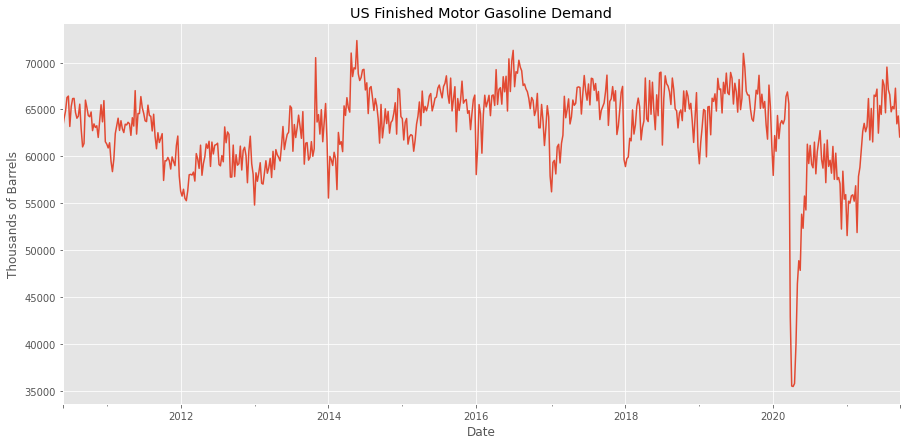

In [5]:
df.Demand.plot(title='US Finished Motor Gasoline Demand', ylabel='Thousands of Barrels');

# Forecast

Our task is to forecast the weekly demand in thousands of barrels for the weeks between Oct 20 through Nov 3. We will ask for your 3 week forecast on Oct 15. Once Oct 15th passes, your forecast will be "locked." i.e. No updates based on new data is allowed. This will be team based with a max team of 4.

# Time Series Forecasting Pitfalls

1. Do **not** let the future bleed into your current forecast. For example, when training your model, if you're forecasting today's volumes using COVID data but you're using today's COVID numbers, you've let the "future" bleed into your forecast. Instead you should be using COVID from 3 weeks ago if you're building a 3 week forecast.
1. There is a strong AutoRegressive component to this demand data (i.e. today's price is correlated with yesterday's price).
1. There is a strong seasonal component to this demand data.

# Questions About this Data?

If you're interested in participating please stay on the line and I will break up the group into teams of four to start working on this problem for the remainder of the time today.